In [4]:
pip install geopandas

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install cartopy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


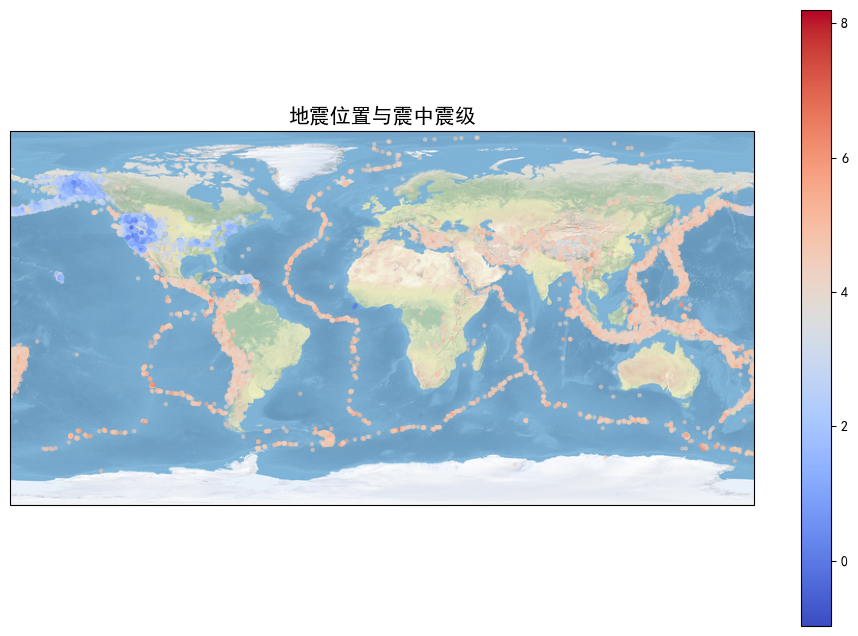

In [10]:
import warnings
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
from matplotlib import rcParams

# 忽略Cartopy的字体警告
warnings.filterwarnings("ignore", category=UserWarning, module="cartopy")

# 设置matplotlib使用SimHei字体以支持中文显示
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
rcParams['axes.unicode_minus'] = False    # 正常显示负号

# 加载数据集 (假设文件路径在 'C:/Users/Lenovo/...')
data_path = "C:/Users/Lenovo/usgs_earthquakes.csv"
df = pd.read_csv(data_path)

# 显示数据前几行，查看数据结构
df.head()

# 使用经纬度列创建GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# 设置坐标参考系统 (CRS) 为 WGS84（经度，纬度）
gdf.set_crs('EPSG:4326', allow_override=True, inplace=True)

# 创建一个 Cartopy 的地图投影（使用 PlateCarree 投影）
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# 绘制世界地图背景
ax.stock_img()  # 使用 Cartopy 提供的地图背景图像

# 根据震中震级（mag）绘制地震位置，颜色表示震中震级
gdf.plot(ax=ax, marker='o', column='mag', cmap='coolwarm', markersize=5, alpha=0.5, legend=True)

# 添加标题和坐标轴标签
plt.title('地震位置与震中震级', fontsize=15)
plt.xlabel('经度')
plt.ylabel('纬度')

# 显示地图
plt.show()


数据中包含的变量： ['AODANA', 'AODINC']


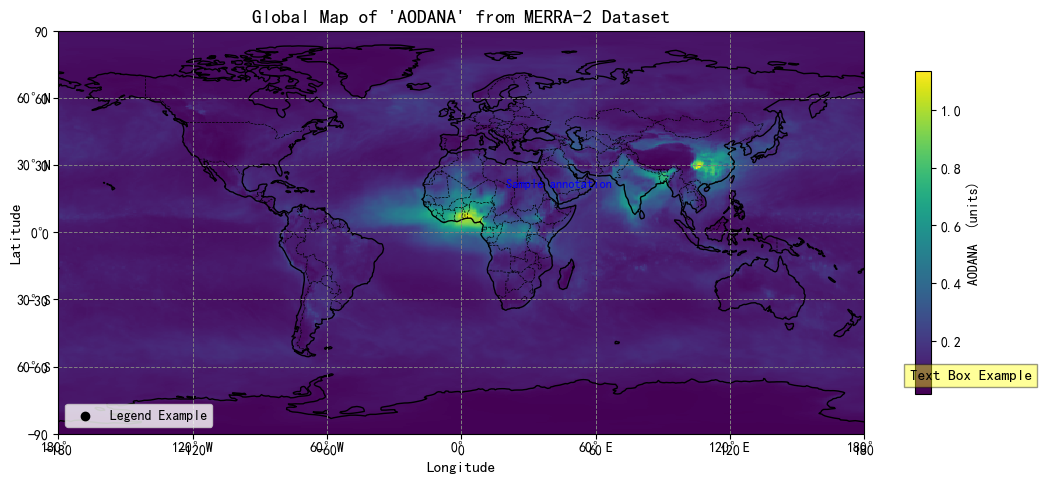

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# -----------------------------------------------------------
# 1. 读取数据
# -----------------------------------------------------------
file_path = r"C:\Users\Lenovo\MERRA2_400.instU_2d_gas_Nx.201801_202510.nc"
ds = xr.open_dataset(file_path)

print("数据中包含的变量：", list(ds.data_vars))

# -----------------------------------------------------------
# 2. 选择一个变量进行绘图（请根据输出修改）
# -----------------------------------------------------------
var_name = list(ds.data_vars)[0]   # 默认选第一个变量
da = ds[var_name].isel(time=0)     # 取第一个时间点画空间图

# -----------------------------------------------------------
# 3. 创建图形 + 选择地图投影（PlateCarree 是等经纬投影）
# -----------------------------------------------------------
fig = plt.figure(figsize=(13, 6))
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

# -----------------------------------------------------------
# 4. 绘制主图（全球地图）
# -----------------------------------------------------------
img = da.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    add_colorbar=False,  # 手动加
    add_labels=False     # 自己设置轴标签
)

# -----------------------------------------------------------
# 5. 添加地理要素（features）
# -----------------------------------------------------------
ax.coastlines(linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle="--", linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor="lightgray", alpha=0.5)
ax.add_feature(cfeature.OCEAN, facecolor="white", alpha=0.25)

# -----------------------------------------------------------
# 6. 设置 x/y label 与 ticks
# -----------------------------------------------------------
ax.set_xticks(np.arange(-180, 181, 60), crs=projection)
ax.set_yticks(np.arange(-90, 91, 30), crs=projection)
ax.set_xlabel("Longitude", fontsize=11)
ax.set_ylabel("Latitude", fontsize=11)

# -----------------------------------------------------------
# 7. 添加网格线（gridlines）
# -----------------------------------------------------------
gl = ax.gridlines(draw_labels=True, linewidth=0.7, color="gray", linestyle="--")
gl.top_labels = False
gl.right_labels = False

# -----------------------------------------------------------
# 8. 添加 Colorbar
# -----------------------------------------------------------
cbar = plt.colorbar(img, ax=ax, orientation="vertical", shrink=0.7)
cbar.set_label(f"{var_name}  (units)", fontsize=10)

# -----------------------------------------------------------
# 9. 添加 Legend（图例）
# -----------------------------------------------------------
plt.scatter([], [], color="black", label="Legend Example")
plt.legend(loc="lower left")

# -----------------------------------------------------------
# 10. 添加 Annotations（标注）
# -----------------------------------------------------------
ax.annotate(
    "Sample annotation",
    xy=(20, 20), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
    fontsize=9, color="blue"
)

# -----------------------------------------------------------
# 11. 添加 Text Box（文本框）
# -----------------------------------------------------------
plt.gcf().text(
    0.78, 0.25,
    "Text Box Example",
    fontsize=11,
    bbox=dict(facecolor="yellow", alpha=0.4)
)

# -----------------------------------------------------------
# 12. 标题
# -----------------------------------------------------------
plt.title(f"Global Map of '{var_name}' from MERRA-2 Dataset", fontsize=14)

plt.show()


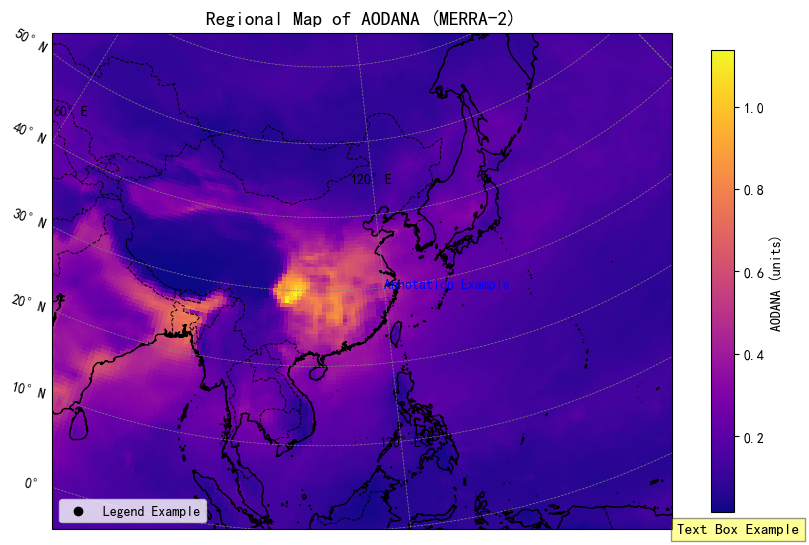

In [17]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. 读取数据
file_path = r"C:\Users\Lenovo\MERRA2_400.instU_2d_gas_Nx.201801_202510.nc"
ds = xr.open_dataset(file_path)

var_name = list(ds.data_vars)[0]
da = ds[var_name].isel(time=0)

# 经纬度
lats = ds["lat"].values
lons = ds["lon"].values
LON, LAT = np.meshgrid(lons, lats)

# 区域范围
lon_min, lon_max = 80, 150
lat_min, lat_max = 0, 60

# 2. 投影（不同于全球图）
proj = ccrs.LambertConformal(central_longitude=110, central_latitude=30)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=proj)

# 3. 绘制数据（pcolormesh）
img = ax.pcolormesh(
    LON, LAT, da,
    cmap="plasma",
    transform=ccrs.PlateCarree()
)

# 4. 显示区域
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# 5. 地理要素
ax.coastlines(resolution="10m", linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle='--', linewidth=0.7)
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.4)

# ❗ 6. 自动刻度（必须用 gridlines，不可 set_xticks）
gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    linestyle="--",
    color="gray"
)
gl.top_labels = False
gl.right_labels = False

# 7. Colorbar
cbar = plt.colorbar(img, ax=ax, shrink=0.75)
cbar.set_label(f"{var_name} (units)")

# 8. Legend
plt.scatter([], [], color="black", label="Legend Example")
plt.legend(loc="lower left")

# 9. Annotation
ax.text(
    120, 30, "Annotation Example",
    transform=ccrs.PlateCarree(),
    fontsize=10,
    color="blue"
)

# 10. Text Box
plt.gcf().text(
    0.75, 0.18,
    "Text Box Example",
    fontsize=11,
    bbox=dict(facecolor='yellow', alpha=0.4)
)

# 11. Title
plt.title(f"Regional Map of {var_name} (MERRA-2)", fontsize=14)

plt.show()
